

<h1 align="center"><font size="5">Classification with Python</font></h1>



I load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

-first load required libraries:

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [ ]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2021-03-02 14:06:38--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.07s   

2021-03-02 14:06:39 (305 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [ ]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [ ]:
df.shape

(346, 10)

### Convert to date time object 

In [ ]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [ ]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [ ]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |             main           3 KB  anaconda
    _py-xgboost-mutex-2.0      |            cpu_0           9 KB  anaconda
    _pytorch_select-0.1        |            cpu_0           2 KB  anaconda
    absl-py-0.10.0             |           py37_0         169 KB  anaconda
    aiohttp-3.6.3              |   py37h7b6447c_0         626 KB  anaconda
    argon2-cffi-20.1.0         |   py37h7b6447c_1         

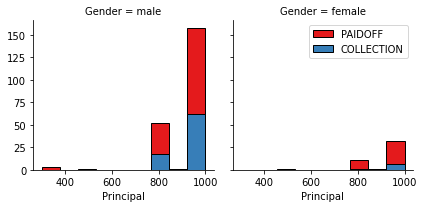

In [ ]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

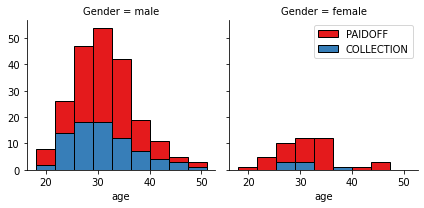

In [ ]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

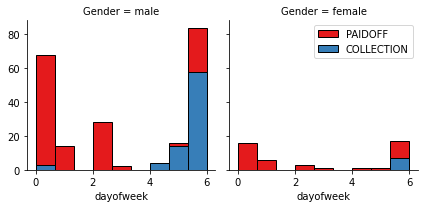

In [ ]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [ ]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [ ]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [ ]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [ ]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [ ]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [ ]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [ ]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [ ]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [ ]:
from sklearn import preprocessing 
  
label_encoder = preprocessing.LabelEncoder() 

In [ ]:
y=label_encoder.fit_transform(y)

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [ ]:
from sklearn.model_selection import train_test_split
# let's separate the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

X_train.shape, X_test.shape

((276, 8), (70, 8))

In [ ]:
# standardisation: with the StandardScaler from sklearn
# the scaler - for standardisation
from sklearn.preprocessing import StandardScaler
# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#X= preprocessing.StandardScaler().fit(X).transform(X)
#X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

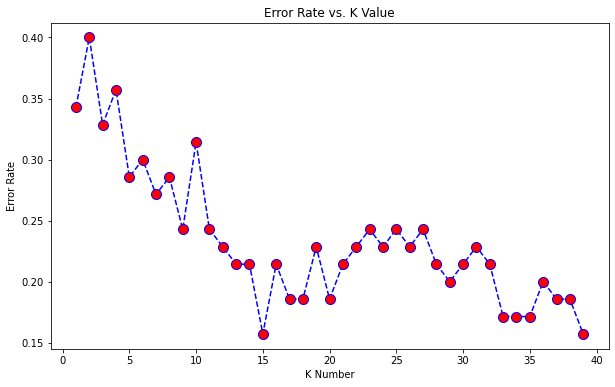

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color= 'blue', linestyle= 'dashed', marker='o',
 markerfacecolor= 'red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Number')
plt.ylabel('Error Rate')

In [ ]:
from sklearn import metrics
# NOW WITH K=15
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)

jaccard1 = jaccard_score(y_test, pred, average='weighted')
fscore1 = f1_score(y_test, pred, average='weighted')
print('Jaccard Score of KNN is {:.4f}.'.format(jaccard1))
print('F1 Score of KNN is {:.4f}.'.format(fscore1))
print("Accuracy of model at K=15 is",metrics.accuracy_score(y_test, pred))


Jaccard Score of KNN is 0.7419.
F1 Score of KNN is 0.8336.
Accuracy of model at K=15 is 0.8428571428571429


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree.fit(X_train_scaled,y_train)
predTree = Tree.predict(X_test_scaled)
jaccard2 = jaccard_score(y_test, predTree, average='weighted')
fscore2 = f1_score(y_test, predTree, average='weighted')
print('Jaccard Score of Decision Tree is {:.4f}.'.format(jaccard2))
print('F1 Score of Decision Tree is {:.4f}.'.format(fscore2))
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

Jaccard Score of KNN is 0.6100.
F1 Score of KNN is 0.7428.
DecisionTrees's Accuracy:  0.7142857142857143


# Support Vector Machine

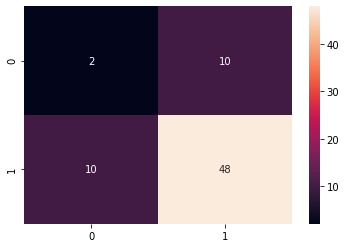

In [ ]:
from sklearn import svm
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
clf = svm.SVC(kernel='rbf')
clf.fit(X_train_scaled, y_train) 
yhat = clf.predict(X_test_scaled)
cm=confusion_matrix(y_test,yhat)
sns.heatmap(cm,annot=True, fmt='d')

In [ ]:
jaccard3 = jaccard_score(y_test, yhat)
fscore3 = f1_score(y_test, yhat, average='weighted')
print('Jaccard Score of SVC is {:.4f}.'.format(jaccard3))
print('F1 Score of SVC is {:.4f}.'.format(fscore3))
print ("SVC's Evaluation: ",classification_report(y_test, yhat))

Jaccard Score of SVC is 0.7059.
F1 Score of SVC is 0.7143.
SVC's Evaluation:                precision    recall  f1-score   support

           0       0.17      0.17      0.17        12
           1       0.83      0.83      0.83        58

    accuracy                           0.71        70
   macro avg       0.50      0.50      0.50        70
weighted avg       0.71      0.71      0.71        70



In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100], 'gamma':[1,0.1, 0.01, 0.001], 'kernel':['rbf']}
grid_svc=GridSearchCV(svm.SVC(),param_grid, refit=True, verbose=4)
grid_svc.fit(X_train_scaled, y_train) 


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.732, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.745, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.727, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.727, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.727, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.732, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.655, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.691, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.732, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.745, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.727, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.727, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.727, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.4s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [ ]:
grid_svc.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

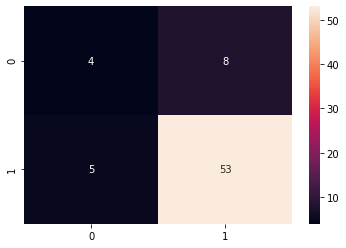

In [ ]:
yhat_grid = grid_svc.predict(X_test_scaled)
cm_grid=confusion_matrix(y_test,yhat_grid)
sns.heatmap(cm_grid,annot=True, fmt='d')

In [ ]:
jaccard4 = jaccard_score(y_test, yhat_grid)
fscore4 = f1_score(y_test, yhat_grid, average='weighted')
print('Jaccard Score of SVC with Grid is {:.4f}.'.format(jaccard4))
print('F1 Score of SVC with Grid is {:.4f}.'.format(fscore4))
print ("SVC's Evaluation with Grid")
print(classification_report(y_test, yhat_grid))

Jaccard Score of SVC with Grid is 0.8030.
F1 Score of SVC with Grid is 0.8034.
SVC's Evaluation with Grid
              precision    recall  f1-score   support

           0       0.44      0.33      0.38        12
           1       0.87      0.91      0.89        58

    accuracy                           0.81        70
   macro avg       0.66      0.62      0.64        70
weighted avg       0.80      0.81      0.80        70



# Logistic Regression

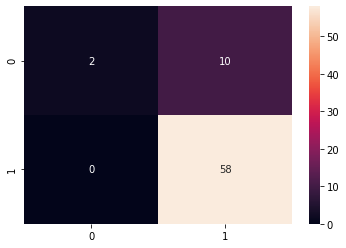

In [ ]:
from sklearn.linear_model import LogisticRegression
#,C=0.01, solver='liblinear'
LR = LogisticRegression(random_state=0).fit(X_train_scaled,y_train)
yhat_log = LR.predict(X_test_scaled)
yhat_prob = LR.predict_proba(X_test_scaled)
cm_log=confusion_matrix(y_test,yhat_log)
sns.heatmap(cm_log,annot=True, fmt='d')

In [ ]:
jaccard5 = jaccard_score(y_test, yhat_log)
fscore5 = f1_score(y_test, yhat_log, average='weighted')
log_los=log_loss(y_test, yhat_prob)
print('Jaccard Score of Log Regression is {:.4f}.'.format(jaccard5))
print('F1 Score of Log Regression is {:.4f}.'.format(fscore5))
print('LogLoss of Log Regression is {:.4f}.'.format(log_los))
print ("Log Regression's Evaluation")
print(classification_report(y_test, yhat_log))

Jaccard Score of Log Regression is 0.8529.
F1 Score of Log Regression is 0.8118.
LogLoss of Log Regression is 0.3612.
Log Regression's Evaluation
              precision    recall  f1-score   support

           0       1.00      0.17      0.29        12
           1       0.85      1.00      0.92        58

    accuracy                           0.86        70
   macro avg       0.93      0.58      0.60        70
weighted avg       0.88      0.86      0.81        70



# Report
Reporting the accuracy of the built model using different evaluation metrics:

In [ ]:
list_jaccard = [jaccard1, jaccard2, jaccard3, jaccard4,jaccard5]
list_f1 = [fscore1, fscore2, fscore3, fscore4,fscore5]
list_logloss = ['NA', 'NA', 'NA', 'NA', log_los]
report = pd.DataFrame(list_jaccard, index=['KNN','Decision Tree','SVM', 'SVM with GRID','Logistic Regression'])
report.columns = ['Jaccard']
report.insert(loc=1, column='F1-score', value=list_f1)
report.insert(loc=2, column='LogLoss', value=list_logloss)
report.columns.name = 'Algorithm'
report

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.741923,0.833613,NA
Decision Tree,0.609977,0.742825,NA
SVM,0.705882,0.714286,NA
SVM with GRID,0.803030,0.803361,NA
Logistic Regression,0.852941,0.811791,0.361202
